In [56]:
# part 1
import pickle
import numpy as np

In [57]:
with open("./004 UPDATED-NLP-COURSE/UPDATED_NLP_COURSE/06-Deep-Learning/train_qa.txt" , "rb") as f:
    train_data = pickle.load(f)

In [58]:
with open("./004 UPDATED-NLP-COURSE/UPDATED_NLP_COURSE/06-Deep-Learning/test_qa.txt" , "rb") as f:
    test_data = pickle.load(f)

In [59]:
type(test_data)

list

In [60]:
len(train_data)

10000

In [61]:
len(test_data)

1000

In [62]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [63]:
# story
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [64]:
# question
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [65]:
# answer
"".join(train_data[0][2])

'no'

In [66]:
# to begin with, we need to set up a vocabulary of all the words we have in our dataset
# we need to get in account both train and test data

In [67]:
all_data = train_data + test_data

In [68]:
len(all_data)

11000

In [69]:
vocab = set()

for story,question,answer in all_data:
   
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [70]:
vocab.add("no")

In [71]:
vocab.add("yes")

In [72]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [73]:
# adding 1, bcz later on when we perform keras sequences we have little placeholder
vocab_len = len(vocab) + 1

In [74]:
vocab_len

38

In [75]:
# how long is the longest story

In [76]:
all_story_lens = [len(data[0]) for data in all_data]

In [77]:
max_story_len = max(all_story_lens)

In [78]:
max_story_len

156

In [79]:
# how long is the longest question

In [80]:
all_questions_lens = [len(data[1]) for data in all_data]

In [81]:
max_ques_len = max(all_questions_lens)

In [82]:
max_ques_len

6

In [83]:
# review
# we explored the data
# opened it up using pickle functionality
# saw, that data is in the form of list
# where every item is in the form of tuple
# built out a vocabulary using set
# using union we kept adding words, until we got all unique words
# and then we calculated max story length and max question length
# we are gonna use it in keras pad sequences, once we vectorize the data

In [84]:
# part 2
# how to vectorize the data
# create a function that can vectorize data for us

In [85]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [86]:
# create an integer encoding for the sequences of words

In [87]:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [88]:
tokenizer.word_index

{'took': 1,
 'mary': 2,
 'apple': 3,
 'the': 4,
 'bedroom': 5,
 'moved': 6,
 'travelled': 7,
 'left': 8,
 'no': 9,
 'up': 10,
 'garden': 11,
 'daniel': 12,
 'back': 13,
 'kitchen': 14,
 'dropped': 15,
 'office': 16,
 '.': 17,
 'hallway': 18,
 'down': 19,
 'football': 20,
 'journeyed': 21,
 'is': 22,
 '?': 23,
 'put': 24,
 'in': 25,
 'milk': 26,
 'yes': 27,
 'sandra': 28,
 'john': 29,
 'went': 30,
 'got': 31,
 'bathroom': 32,
 'picked': 33,
 'discarded': 34,
 'grabbed': 35,
 'there': 36,
 'to': 37}

In [89]:
# how we can vectorize story, question, answer in manual fashion

In [90]:
train_story_text = []
train_question_text = []
train_answers = []

In [91]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [92]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [97]:
len(train_story_text)

10000

In [110]:
len(train_story_seq)

10000

In [98]:
# let's create a function which can help us vectorize the text

In [114]:
# we need to pass max_story_len and max_question_len
# bcz, we are going to use padding sequences
# not every story and not every question is the same length
# but, the actual RNN we are training on, it needs  things to be in same length
# so, we will pad it up wit zeros, in case some story is too short
# or we want to cut down a story, if its too long

def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len = max_story_len,max_ques_len = max_ques_len):
    
    # stories
    X = []
    # questions
    Xq = []
    # correct answer(yes/no)
    Y = []
    
    for story,question,answer in data:
        
        # for each story in dataset
        x = [word_index[word.lower()] for word in story]
    
        xq = [word_index[word.lower()] for word in question]
        
        # plus 1, bcz index 0 is reserved when we use pad sequences
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen= max_story_len), pad_sequences(Xq,maxlen = max_ques_len), np.array(Y))

In [115]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [116]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [117]:
inputs_test

array([[ 0,  0,  0, ...,  4,  5, 17],
       [ 0,  0,  0, ...,  4, 11, 17],
       [ 0,  0,  0, ...,  4, 11, 17],
       ...,
       [ 0,  0,  0, ...,  4,  3, 17],
       [ 0,  0,  0, ...,  4, 11, 17],
       [ 0,  0,  0, ...,  3, 36, 17]], dtype=int32)

In [118]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
tokenizer.word_index["no"]

9

In [134]:
tokenizer.word_index["yes"]

27

In [135]:
# there are 503 1's at index location 9, or 503 no's
# there are 497 1's at index location 27, or 497 yes's
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [138]:
# we have successfully vectorized our stories, questions and answers
# now we have data in the correct format for creating the model with keras layers


In [139]:
# part 3
# building neural network
# - input encoder M
# - input encoder C
# - Question Encoder


In [140]:
from keras.models import Sequential,Model

In [141]:
from keras.layers.embeddings import Embedding

In [143]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [145]:
# we have story that encoder needs to understand
# we need to map and story and question to achive the results
# we will create placeholders using input functions of keras


In [156]:
# we are creating placeholders to recive input
# placeholder shape = (max_story_len , batch_size)
input_sequence = Input((max_story_len,))
question1 = Input((max_ques_len,))

In [157]:
vocab_size = len(vocab) + 1

In [158]:
# INPUT ENCODER M
# this input gets embedded, to a sequence of vectors

In [159]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size , output_dim = 64))
input_encoder_m.add(Dropout(0.3))

# dropout = o.5 means that 50% of the neurons will be dropped out randomly during training
# and that helps with overfitting

# this encoder is going to output in the form of 
# (samples, story_maxlen, embedding_dim)

In [160]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size , output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

# this encoder is going to output in the form of 
# (samples, story_maxlen, max_question_len)

In [161]:
question_encoder= Sequential()
question_encoder.add(Embedding(input_dim = vocab_size , output_dim = 64, input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

# (samples,question_maxlen,embedding_dim)

In [163]:
# encoded <-- encoder(input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question1)

In [164]:
match = dot([input_encoded_m,question_encoded],axes = (2,2))
match = Activation("softmax")(match)

In [165]:
response = add([match , input_encoded_c])
response = Permute((2,1))(response)

In [167]:
answer = concatenate([response,question_encoded])

In [168]:
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(?, 6, 220) dtype=float32>

In [169]:
answer = LSTM(32)(answer)

In [170]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)   #(samples, vocab_size)  Yes/No 0000

In [171]:
answer = Activation("softmax")(answer)

In [173]:
# answer links together all the encoders
model = Model([input_sequence,question1],answer)

In [175]:
model.compile(optimizer="rmsprop" , loss = "categorical_crossentropy" ,metrics = ["accuracy"])

In [176]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       multiple             2432        input_2[0][0]                    
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 6, 64)        2432        input_3[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

In [177]:
# part 4
# train and fit our model
# evaluate the model on given test set

In [179]:
history = model.fit([inputs_train,questions_train], answers_train,batch_size=32,epochs = 100,validation_data=([inputs_test,questions_test],answers_test))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 10s 961us/step - loss: 0.9342 - acc: 0.4905 - val_loss: 0.6947 - val_acc: 0.4970
Epoch 2/100
10000/10000 [==============================] - 6s 561us/step - loss: 0.7050 - acc: 0.5007 - val_loss: 0.6950 - val_acc: 0.5030
Epoch 3/100
10000/10000 [==============================] - 5s 539us/step - loss: 0.6968 - acc: 0.4939 - val_loss: 0.6948 - val_acc: 0.4970
Epoch 4/100
10000/10000 [==============================] - 5s 547us/step - loss: 0.6950 - acc: 0.5014 - val_loss: 0.6949 - val_acc: 0.5030
Epoch 5/100
10000/10000 [==============================] - 5s 541us/step - loss: 0.6952 - acc: 0.4918 - val_loss: 0.6936 - val_acc: 0.5030
Epoch 6/100
10000/10000 [==============================] - 5s 547us/step - loss: 0.6947 - acc: 0.4955 - val_loss: 0.6937 - val_ac

10000/10000 [==============================] - 5s 532us/step - loss: 0.3311 - acc: 0.8575 - val_loss: 0.3892 - val_acc: 0.8370
Epoch 56/100
10000/10000 [==============================] - 5s 532us/step - loss: 0.3308 - acc: 0.8585 - val_loss: 0.3636 - val_acc: 0.8290
Epoch 57/100
10000/10000 [==============================] - 5s 541us/step - loss: 0.3303 - acc: 0.8587 - val_loss: 0.3601 - val_acc: 0.8350
Epoch 58/100
10000/10000 [==============================] - 5s 530us/step - loss: 0.3237 - acc: 0.8602 - val_loss: 0.3603 - val_acc: 0.8240
Epoch 59/100
10000/10000 [==============================] - 5s 531us/step - loss: 0.3245 - acc: 0.8588 - val_loss: 0.3704 - val_acc: 0.8370
Epoch 60/100
10000/10000 [==============================] - 5s 532us/step - loss: 0.3233 - acc: 0.8625 - val_loss: 0.3662 - val_acc: 0.8290
Epoch 61/100
10000/10000 [==============================] - 5s 529us/step - loss: 0.3160 - acc: 0.8672 - val_loss: 0.3588 - val_acc: 0.8290
Epoch 62/100
10000/10000 [=======

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


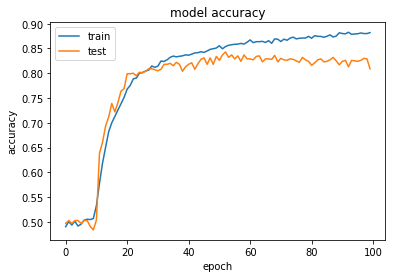

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()


In [183]:
filename = "chatbot_10.h55"
model.save(filename)

In [184]:
pred_results = model.predict(([inputs_test,questions_test]))

In [185]:
pred_results.shape

(1000, 38)

In [186]:
pred_results[0]

array([4.5173243e-18, 4.1515012e-18, 4.8561896e-18, 5.1949672e-18,
       4.1713130e-18, 4.7499614e-18, 5.8911617e-18, 3.9163139e-18,
       6.2096449e-18, 9.9997151e-01, 5.7046846e-18, 4.0462148e-18,
       5.1981390e-18, 3.4345283e-18, 5.0304501e-18, 5.4378237e-18,
       5.2323578e-18, 3.0289727e-18, 5.6664693e-18, 6.2443256e-18,
       4.4225555e-18, 5.1834859e-18, 3.7951849e-18, 5.8173325e-18,
       3.8956332e-18, 4.3557846e-18, 4.3002126e-18, 2.8438311e-05,
       5.9433949e-18, 4.8427219e-18, 6.8474367e-18, 4.0542802e-18,
       3.7220634e-18, 5.8724939e-18, 5.3237646e-18, 5.2041307e-18,
       4.9210484e-18, 3.9841986e-18], dtype=float32)

In [217]:
# gives index number of highest probaility
val_max = np.argmax(pred_results[0]) 

In [218]:
for key,val in tokenizer.word_index.items():
    # and print the key, when val matches highest probability value
    if val == val_max:
        k = key      

In [219]:
k

'no'

In [227]:
pred_results[0][val_max]

0.9999715

In [195]:
# we are going to write our own stories and questions
# and run through actual model

In [196]:
# we can only use the words which my model is aware of
# the ones which are there in the vocab

In [197]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [198]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [199]:
my_question = "Is the football in the garden ?"

In [200]:
mydata = [(my_story.split() , my_question.split(),"yes")] 

In [201]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [220]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [221]:
pred_res = model.predict(([my_story,my_ques]))

In [222]:
val_max1 = np.argmax(pred_res[0])

In [223]:
for key,val in tokenizer.word_index.items():
    if val == val_max1:
        k = key
        

In [224]:
k

'yes'

In [226]:
pred_res[0][val_max1]

0.9793636